# Incidence de la varicelle

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import os
import urllib

## Données

J'étudie les données sur l'incdence de la varicelle fournies par le [Réseau Seninelles](http://www.sentiweb.fr/). Les données sont récupérées dans un fichier CSV. Le fichier est téléchargé en local (téléchargement le 02/04/2021) et ne sera téléchargé à nouveau que si le fichier local n'est pas trouvé. Le fichier comprend toutes les données existantes c'est à dire depuis décembre 1990 et jusqu'à la dernière semaine renseignée.

Chaque colonne du fichier correspond à une semaine. 
Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)

Le chemin d'accès du fichier en local est :

In [2]:
data_file = "S:\Formations\Recherche reproductible\incidence-PAY-7.csv"

L'adresse URL pour téléchager les données sur le site du Réseau Sentinelles est :

In [3]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

Si le fichier n'existe pas, on le télécharge à l'URL précédent. Sinon on utilise le fichier déjà téléchargé en local. 
La première ligne du fichier est un commentaire donc on ne l'inclut pas aux données (avec `skiprows = 1` )

In [4]:
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)
raw_data = pd.read_csv(data_file, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202112          7  14023     9841   18205      21          15   
1     202111          7   9501     6752   12250      14          10   
2     202110          7   9056     6452   11660      14          10   
3     202109          7  10988     7938   14038      17          12   
4     202108          7  11281     8361   14201      17          13   
5     202107          7  13561    10315   16807      21          16   
6     202106          7  13401     9810   16992      20          15   
7     202105          7  12210     8988   15432      18          13   
8     202104          7  12026     8826   15226      18          13   
9     202103          7   8913     6375   11451      13           9   
10    202102          7   7795     5430   10160      12           8   
11    202101          7  10525     7750   13300      16          12   
12    202053          7  11978     8406   15550      18          13   
13    202052          7  12012     8285   15739      18          12   
14    202051          7  10564     7574   13554      16          11   
15    202050          7   7063     4744    9382      11           7   
16    202049          7   5026     3145    6907       8           5   
17    202048          7   6683     4312    9054      10           6   
18    202047          7   4999     2963    7035       8           5   
19    202046          7   3752     1963    5541       6           3   
20    202045          7   3696     2016    5376       6           3   
21    202044          7   4391     2375    6407       7           4   
22    202043          7   4376     2505    6247       7           4   
23    202042          7   4000     1979    6021       6           3   
24    202041          7   3961     2099    5823       6           3   
25    202040          7   2078      675    3481       3           1   
26    202039          7   1049      237    1861       2           1   
27    202038          7   2251      781    3721       3           1   
28    202037          7   1584      405    2763       2           0   
29    202036          7    919      100    1738       1           0   
...      ...        ...    ...      ...     ...     ...         ...   
1552  199126          7  17608    11304   23912      31          20   
1553  199125          7  16169    10700   21638      28          18   
1554  199124          7  16171    10071   22271      28          17   
1555  199123          7  11947     7671   16223      21          13   
1556  199122          7  15452     9953   20951      27          17   
1557  199121          7  14903     8975   20831      26          16   
1558  199120          7  19053    12742   25364      34          23   
1559  199119          7  16739    11246   22232      29          19   
1560  199118          7  21385    13882   28888      38          25   
1561  199117          7  13462     8877   18047      24          16   
1562  199116          7  14857    10068   19646      26          18   
1563  199115          7  13975     9781   18169      25          18   
1564  199114          7  12265     7684   16846      22          14   
1565  199113          7   9567     6041   13093      17          11   
1566  199112          7  10864     7331   14397      19          13   
1567  199111          7  15574    11184   19964      27          19   
1568  199110          7  16643    11372   21914      29          20   
1569  199109          7  13741     8780   18702      24          15   
1570  199108          7  13289     8813   17765      23          15   
1571  199107          7  12337     8077   16597      22          15   
1572  199106          7  10877     7013   14741      19          12   
1573  199105          7  10442     6544   14340      18          11   
1574  199104          7   7913     4563   11263      14           8   
1575  199103          7  15387    10484   20290      27          18   
1576  199102          7  16277  

## Tri des données et vérifications

Après inspection visuelle des données, je n'ai pas repéré d'anomalie comme des lignes non renseignées.
Je fais tout de même une vérification avec le code :

In [5]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Il n'y a pas de ligne vide à retirer du jeu de données

Il faut à présent modifier la façon d'écrire la date pour qu'elle soit lisible par pandas. On le fait dans une nouvelle colonne 'period' qui comprend la date de début et la date de fin de la semaine concernée, sous la forme AAAA-MM-JJ/AAAA-MM-JJ

In [6]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

raw_data['period'] = [convert_week(yw) for yw in raw_data['week']]

Je définis la période d'observation comme nouvel index et je trie les données chronologiquement

In [7]:
sorted_data = raw_data.set_index('period').sort_index()
sorted_data

week  indicator    inc  inc_low  inc_up  inc100  \
period                                                                     
1990-12-03/1990-12-09  199049          7   1143        0    2610       2   
1990-12-10/1990-12-16  199050          7  11079     6660   15498      20   
1990-12-17/1990-12-23  199051          7  19080    13807   24353      34   
1990-12-24/1990-12-30  199052          7  19375    13295   25455      34   
1990-12-31/1991-01-06  199101          7  15565    10271   20859      27   
1991-01-07/1991-01-13  199102          7  16277    11046   21508      29   
1991-01-14/1991-01-20  199103          7  15387    10484   20290      27   
1991-01-21/1991-01-27  199104          7   7913     4563   11263      14   
1991-01-28/1991-02-03  199105          7  10442     6544   14340      18   
1991-02-04/1991-02-10  199106          7  10877     7013   14741      19   
1991-02-11/1991-02-17  199107          7  12337     8077   16597      22   
1991-02-18/1991-02-24  199108          7  13289     8813   17765      23   
1991-02-25/1991-03-03  199109          7  13741     8780   18702      24   
1991-03-04/1991-03-10  199110          7  16643    11372   21914      29   
1991-03-11/1991-03-17  199111          7  15574    11184   19964      27   
1991-03-18/1991-03-24  199112          7  10864     7331   14397      19   
1991-03-25/1991-03-31  199113          7   9567     6041   13093      17   
1991-04-01/1991-04-07  199114          7  12265     7684   16846      22   
1991-04-08/1991-04-14  199115          7  13975     9781   18169      25   
1991-04-15/1991-04-21  199116          7  14857    10068   19646      26   
1991-04-22/1991-04-28  199117          7  13462     8877   18047      24   
1991-04-29/1991-05-05  199118          7  21385    13882   28888      38   
1991-05-06/1991-05-12  199119          7  16739    11246   22232      29   
1991-05-13/1991-05-19  199120          7  19053    12742   25364      34   
1991-05-20/1991-05-26  199121          7  14903     8975   20831      26   
1991-05-27/1991-06-02  199122          7  15452     9953   20951      27   
1991-06-03/1991-06-09  199123          7  11947     7671   16223      21   
1991-06-10/1991-06-16  199124          7  16171    10071   22271      28   
1991-06-17/1991-06-23  199125          7  16169    10700   21638      28   
1991-06-24/1991-06-30  199126          7  17608    11304   23912      31   
...                       ...        ...    ...      ...     ...     ...   
2020-08-31/2020-09-06  202036          7    919      100    1738       1   
2020-09-07/2020-09-13  202037          7   1584      405    2763       2   
2020-09-14/2020-09-20  202038          7   2251      781    3721       3   
2020-09-21/2020-09-27  202039          7   1049      237    1861       2   
2020-09-28/2020-10-04  202040          7   2078      675    3481       3   
2020-10-05/2020-10-11  202041          7   3961     2099    5823       6   
2020-10-12/2020-10-18  202042          7   4000     1979    6021       6   
2020-10-19/2020-10-25  202043          7   4376     2505    6247       7   
2020-10-26/2020-11-01  202044          7   4391     2375    6407       7   
2020-11-02/2020-11-08  202045          7   3696     2016    5376       6   
2020-11-09/2020-11-15  202046          7   3752     1963    5541       6   
2020-11-16/2020-11-22  202047          7   4999     2963    7035       8   
2020-11-23/2020-11-29  202048          7   6683     4312    9054      10   
2020-11-30/2020-12-06  202049          7   5026     3145    6907       8   
2020-12-07/2020-12-13  202050          7   7063     4744    9382      11   
2020-12-14/2020-12-20  202051          7  10564     7574   13554      16   
2020-12-21/2020-12-27  202052          7  12012     8285   15739      18   
2020-12-28/2021-01-03  202053          7  11978     8406   15550      18   
2021-01-04/2021-01-10  202101          7  10525     7750   13300      16   
2021-01-11/2021-01-17  202102          7   7795     5430   10160      12 

Une dernière vérification : est-ce que les données sont complètes, c'est à dire est-ce que toutes les semaines sont présentes ? Pour cela on regarde le dernier jour d'une période et le premier de la période suivante qui doivent se suivre et donc avoir un écart très faible. On teste avec un écart de 1 seconde.

In [8]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Aucune date ne s'affiche à l'exécution du code précédent donc toutes les périodes de données sont cohérentes.

On peut donc tester d'afficher les données en graphique

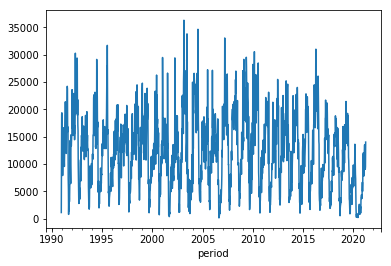

In [9]:
sorted_data['inc'].plot()

Je remarque que les pics d'incidence sont moins fins que pour le cas des syndromes grippaux.
JE zoome sur les dernières années

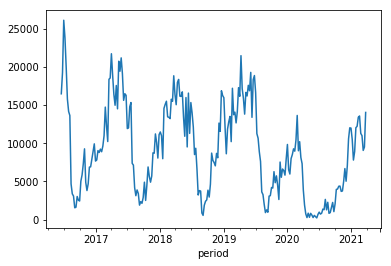

In [10]:
sorted_data['inc'][-250:].plot()

Je note qu'il y a tout de même un creux chaque année autour de la semaine 36, ce qui correspond au début du mois de septembre. 

__Remarque 1 :__ je suis tentée de relier cette dynamique aux vacances estivales pendant lesquelles les enfants ont moins de contacts entre eux et se contaminent donc moins, l'épidémie reprenant au mois de septembre avec la rentrée scolaire. 

__Remarque 2 :__ l'année 2020 a un pic épidémique plus faible que d'habitude, je relie cette observation à la fermeture des écoles qui a eu lieu de mars à juin 2020 due à l'épidémie de Covid-19, ainsi qu'aux mesures d'hygiène et de distanciation renforcées dans les écoles, ce qui a fait baisser les contaminations à la varicelle

## Etude de l'incidence annuelle de la varicelle

On a pu noter précédemment que le creux de l'épidémie de varicelle se situe à la fin de l'été, je veux donc prendre une période de référence allant du __1er septembre__ de l'année $N$ au 1er septembre de l'année $N+1$.
Pour simplifier et s'adapter à nos données (fournies pour 1 semaine) on prendra comme premier jour de chaque période __le premier jour de la semaine qui contient le 1er septembre__.
Je suis consciente qu'en procédent comme cela les périodes de temps étudiées ne seront pas tout à fait égales et pourront comporter 51 ou 52 semaines. Cependant comme l'incidence est faible début septembre il y aura peu de consequences sur nos résultats.

Les données commencent en décembre 1990 donc notre première période de référence n'est pas complète. On ne prendra en compte que les données à partir du 1er septembre 1991.

On crée une liste des semaines qui contiennet un 1er septembre dans nos données :

In [11]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]
first_september_week

[Period('1991-08-26/1991-09-01', 'W-SUN'),
 Period('1992-08-31/1992-09-06', 'W-SUN'),
 Period('1993-08-30/1993-09-05', 'W-SUN'),
 Period('1994-08-29/1994-09-04', 'W-SUN'),
 Period('1995-08-28/1995-09-03', 'W-SUN'),
 Period('1996-08-26/1996-09-01', 'W-SUN'),
 Period('1997-09-01/1997-09-07', 'W-SUN'),
 Period('1998-08-31/1998-09-06', 'W-SUN'),
 Period('1999-08-30/1999-09-05', 'W-SUN'),
 Period('2000-08-28/2000-09-03', 'W-SUN'),
 Period('2001-08-27/2001-09-02', 'W-SUN'),
 Period('2002-08-26/2002-09-01', 'W-SUN'),
 Period('2003-09-01/2003-09-07', 'W-SUN'),
 Period('2004-08-30/2004-09-05', 'W-SUN'),
 Period('2005-08-29/2005-09-04', 'W-SUN'),
 Period('2006-08-28/2006-09-03', 'W-SUN'),
 Period('2007-08-27/2007-09-02', 'W-SUN'),
 Period('2008-09-01/2008-09-07', 'W-SUN'),
 Period('2009-08-31/2009-09-06', 'W-SUN'),
 Period('2010-08-30/2010-09-05', 'W-SUN'),
 Period('2011-08-29/2011-09-04', 'W-SUN'),
 Period('2012-08-27/2012-09-02', 'W-SUN'),
 Period('2013-08-26/2013-09-01', 'W-SUN'),
 Period('20

Je vérifie que les périodes de référence font bien 51 ou 52 semaines. Je somme les incidences hebdomadaires sur chaque période de référence.

In [21]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1], first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52)<2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)
yearly_incidence

1992    832939
1993    643387
1994    661409
1995    652478
1996    564901
1997    683434
1998    677775
1999    756456
2000    617597
2001    619041
2002    516689
2003    758363
2004    777388
2005    628464
2006    632833
2007    717352
2008    749478
2009    842373
2010    829911
2011    642368
2012    624573
2013    698332
2014    685769
2015    604382
2016    782114
2017    551041
2018    542312
2019    584066
2020    221186
dtype: int64

On trace les incidences annuelles :

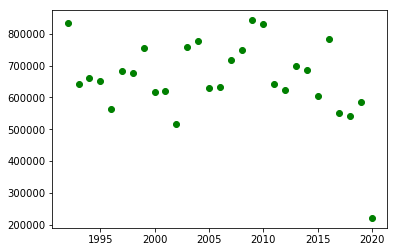

In [45]:
yearly_incidence.plot(style='o' + 'g')

Je vois clairement que l'année 2020 a été une année de faible incidence de la varicelle, le point se détache clairement du reste des données.

Je trie les données d'incidence annuelle selon leur valeur :

In [46]:
yearly_incidence.sort_values()

2020    221186
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

Enfin on peut montrer les résultats dans un histogramme :

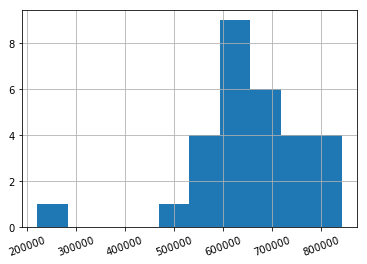

In [51]:
yearly_incidence.hist(xrot=20)

Dans le cas de la varicelle, l'année 2020 est inédite. Les fortes épidémies sont courantes. 